In [58]:
import os
from preprocessing import create_csv

# project and data directories
root_dir = r'Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction'


# compressed image directories
featurized_luad_dir_aug = join(root_dir, 'results', 'tcga_luad', 'featurized', 'augmented_4task')
featurized_lusc_dir_aug = join(root_dir, 'results', 'tcga_lusc', 'featurized', 'augmented_4task')
csv_train = os.path.join(root_dir, 'data', 'train_slide_list_tcga_4task.csv')

create_csv(featurized_luad_dir_aug, featurized_lusc_dir_aug, csv_train, 'npy')


# if bigan:
#     featurized_luad_dir_aug = join(root_dir, 'results', 'tcga_luad', 'featurized', 'augmented')
#     featurized_lusc_dir_aug = join(root_dir, 'results', 'tcga_lusc', 'featurized', 'augmented')

100%|██████████| 12144/12144 [00:00<00:00, 46352.90it/s]


Csv file sucessfully exported!


In [60]:
import pandas as pd 

df = pd.read_csv(csv_train)
df.head(20)

,slide_id,label
0,TCGA-05-4244-01Z-00-DX1_0_horizontal_features,1
1,TCGA-05-4244-01Z-00-DX1_0_horizontal_features_...,1
2,TCGA-05-4244-01Z-00-DX1_0_none_features,1
3,TCGA-05-4244-01Z-00-DX1_0_none_features_distan...,1
4,TCGA-05-4244-01Z-00-DX1_0_vertical_features,1
5,TCGA-05-4244-01Z-00-DX1_0_vertical_features_di...,1
6,TCGA-05-4244-01Z-00-DX1_180_none_features,1
7,TCGA-05-4244-01Z-00-DX1_180_none_features_dist...,1
8,TCGA-05-4244-01Z-00-DX1_270_none_features,1
9,TCGA-05-4244-01Z-00-DX1_270_none_features_dist...,1


In [ ]:
df['slide_id'].replace(regex=True,inplace=False,to_replace=r'\D',value=r'')

In [ ]:
# Get csv files to run model with augmentations
import os

# project and data directories
root_dir = r'Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction'


# compressed image directories
featurized_luad_dir_aug = join(root_dir, 'results', 'tcga_luad', 'featurized', 'augmented_4task')
featurized_lusc_dir_aug = join(root_dir, 'results', 'tcga_lusc', 'featurized', 'augmented_4task')

# if bigan:
#     featurized_luad_dir_aug = join(root_dir, 'results', 'tcga_luad', 'featurized', 'augmented')
#     featurized_lusc_dir_aug = join(root_dir, 'results', 'tcga_lusc', 'featurized', 'augmented')

# Set paths
csv_train = os.path.join(root_dir, 'data', 'train_slide_list_tcga_4task.csv')
csv_val = os.path.join(root_dir, 'data', 'validation_slide_list_tcga_4task.csv')
csv_test = os.path.join(root_dir, 'data', 'test_slide_list_tcga_4task.csv')

# csv paths
csv_path_wsi = os.path.join(root_dir, 'data', 'slide_original_list_tcga.csv')
csv_path_compressed_wsi = os.path.join(root_dir, 'data', 'slide_compressed_list_tcga.csv')

os.system('mkdir /home/user/data')
cache_dir = '/home/user/data'  # used to store local copies of files during I/O operations (useful in cluster

# Train CNN

# selected_fold = 0

featurized_dir = {'data_dir_luad': featurized_luad_dir_aug, 'data_dir_lusc': featurized_lusc_dir_aug}
csv_path = {'csv_train': csv_train, 'csv_val': csv_val, 'csv_test': csv_test}

# TO DO: Test/split should be done once, during preprocessing not here.
# # Create csv files
# print('Creating compressed wsi csv file ...')
# create_csv(dir_luad_wsi, dir_lusc_wsi, csv_path_compressed_wsi, 'tif')
#
# print('Creating split train/validation/test csv files with augmentations ...')
# generate_csv_files(csv_path_compressed_wsi, csv_train, csv_val, csv_test, test_size=0.2, validation_size=0.3)
    
    

In [1]:
import pandas as pd
import keras
from os.path import join
import getpass
username = getpass.getuser()
print(username)

Using TensorFlow backend.


Gabriel Raya


In [2]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [7]:
username = 'else'

if username == 'Gabriel Raya':
    root_dir = r'E:\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction'
else: 
    # project and data directories
    root_dir = r'Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction'


model_name = 'baseline_8_100_4task'
# compressed image directories
featurized_luad_dir = join(root_dir, 'results', 'tcga_luad', 'featurized')
featurized_lusc_dir = join(root_dir, 'results', 'tcga_lusc', 'featurized')

predictions_csv = join(root_dir, 'results', 'models', model_name, 'eval') + '\preds.csv' 

In [8]:
# Get predictions
predcs = pd.read_csv(predictions_csv)
predcs.head(25)

,Unnamed: 0,id,label,pred
0,0,TCGA-05-4245-0,1,0.589170
1,1,TCGA-05-4249-0,1,0.912567
2,2,TCGA-05-4398-0,1,0.906325
3,3,TCGA-05-4418-0,1,0.519700
4,4,TCGA-05-4426-0,1,0.777616
5,5,TCGA-18-3406-0,0,0.079645
6,6,TCGA-18-3408-0,0,0.558530
7,7,TCGA-18-3410-0,0,0.039116
8,8,TCGA-18-3414-0,0,0.060300
9,9,TCGA-18-4086-0,0,0.004281


In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import os

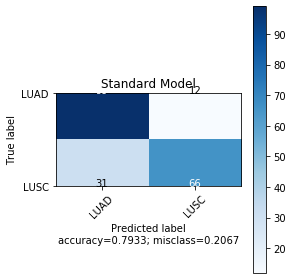

In [10]:
probs, labels = np.array(predcs['pred']),  np.array(predcs['label'])
cm = confusion_matrix(labels.astype(int), np.round(probs).astype(int)) 

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['LUAD', 'LUSC'],
                      title        = "Standard Model")

In [ ]:
def get_missclasified()


In [ ]:
def top_misclassified(df, threshold):
    labels = df['label']
    

In [28]:
tp = predcs['label']==1 

In [70]:
os.listdir(models_dir)

['baseline_8_100_4task',
 'baseline_8_100_bigan',
 'baseline_aug_8_100',
 'baseline_aug_8_100_4task',
 'baseline_aug_8_2']

# Results

In [71]:
root_dir = r'Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction'
models_dir = join(root_dir, 'results', 'models')

model_names = ['baseline_8_100_4task', 'baseline_aug_8_100', 'baseline_aug_8_100_4task', 'baseline_aug_8_2']
model_names = os.listdir(models_dir)



In [72]:
for model_name in model_paths:
    print(model_paths[model_name])

Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\results\models\baseline_8_100_4task\eval\preds.csv
Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\results\models\baseline_aug_8_100\eval\preds.csv
Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\results\models\baseline_aug_8_100_4task\eval\preds.csv
Z:\projects\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\results\models\baseline_aug_8_2\eval\preds.csv


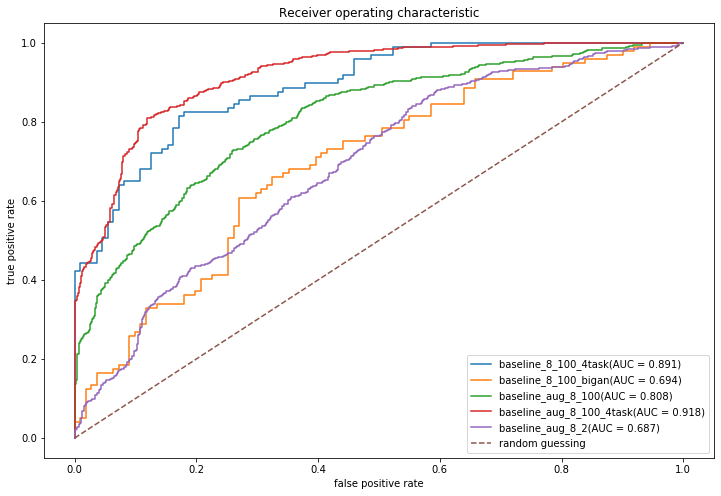

In [73]:
from model_training import plot_roc
from sklearn.metrics import roc_curve, auc
%matplotlib inline

def get_predictions(csv_preds_path):
    df = pd.read_csv(csv_preds_path, header=0, index_col=0)
    labels, preds = df['label'].values.astype('int'), df['pred'].values
    return labels, preds

def plot_roc(labels, probs, name):
    fpr, tpr, _ = roc_curve(labels, probs)
    roc_auc = auc(fpr, tpr)
    title = '{tag}(AUC = {a:0.3f})'.format(tag=name, a=roc_auc)
    plt.plot(fpr, tpr, label=title)


plt.figure(figsize=(12, 8))
for model_name in model_names:
    plot_roc(*get_predictions(join(models_dir, model_name,'eval', 'preds.csv')), model_name)
plt.plot([0, 1], label='random guessing', linestyle='dashed')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

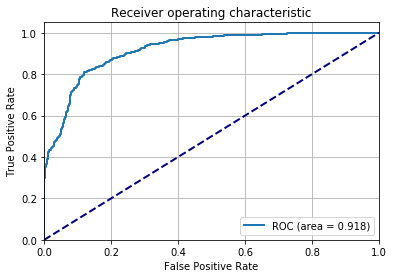

In [59]:
fpr, tpr, _ = roc_curve(labels, preds)
roc_auc = auc(fpr, tpr)
# plt.figure()
lw = 2
l = 'ROC {tag}(area = {a:0.3f})'.format(tag='' if legend_label is None else legend_label, a=roc_auc)
plt.plot(fpr, tpr, lw=lw, label=l)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.grid(b=True, which='both')
plt.legend(loc="lower right")


In [ ]:


# F1 score
f1_s, f1_th = f1_score_plot(labels, preds, join(output_dir, 'f1.png'))
results['f1_score'] = [f1_s]
results['f1_threshold'] = [f1_th]

# Store
pd.DataFrame(results).T.to_csv(join(output_dir, 'metrics.csv'))

In [20]:
# Test set
from data_processing import read_data, FeaturizedWsiSequence


print('Loading test set ...', flush=True)
test_gen = FeaturizedWsiSequence(
    data_config,
    data_fn=read_data,
    batch_size=2,
    crop_size=400,
    cache_dir=None,
    balanced=False,
    keep_data=False,
    return_ids=True
)

Loading test set ...
FeaturizedWsiSequence data config: {'data_dir_luad': 'E:\\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\\results\\tcga_luad\\featurized', 'data_dir_lusc': 'E:\\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\\results\\tcga_lusc\\featurized', 'csv_path': 'E:\\pathology-weakly-supervised-lung-cancer-growth-pattern-prediction\\data\\test_slide_list_tcga.csv'}
FeaturizedWsiSequence using 0 samples and 0 batches, distributed in 0 positive and 0 negative samples.


In [12]:
# Predictions
ids = []
labels = []
preds = []
for i in range(len(test_gen)):

    print('Predicting batch {i}/{n} ...'.format(i=i + 1, n=len(test_gen)), flush=True)
    x, y, id = test_gen[i]

    pred = model.predict_on_batch(x)
    if pred.shape[-1] > 2:
        pred = pred.argmax(axis=-1)
    else:
        pred = pred[:, 1]

    ids.extend(id)
    labels.extend(y.argmax(axis=-1))
    preds.extend(pred)

NameError: name 'test_gen' is not defined

In [24]:
preds

[]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
from collections import defaultdict
from sklearn.metrics import confusion_matrix
import torch, torchvision
import itertools

import data
import model

In [2]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):


    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

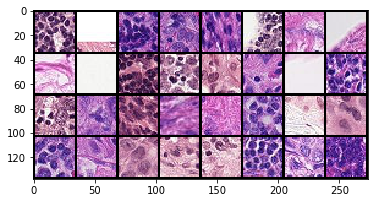

In [3]:
def softmax(x):
    return np.exp(x[:, 1]) / np.sum(np.exp(x), axis=1)

def evaluation(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

def imshow(img):
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

def run_model(model, testloader):
    predictions = []
    result_labels = []
    for images, labels in tqdm(testloader):
        outputs = model(images)
        predictions += list(softmax(outputs.data.numpy()))
        result_labels += list(labels)
    predictions = np.array(predictions)
    return predictions, result_labels

def validate(model):
    result = defaultdict(int)
    for images, labels in tqdm(data.valid_loader):
        outputs = model(images)
        predictions = (outputs[:, 0] < outputs[:, 1]).data.numpy()
        labels = labels.data.numpy().astype(bool)
        result['tp'] += np.sum(labels & predictions)
        result['fp'] += np.sum(np.logical_not(labels) & predictions)
        result['tn'] += np.sum(np.logical_not(labels) & np.logical_not(predictions))
        result['fn'] += np.sum(labels & np.logical_not(predictions))
    return result

def accuracy(results):
    return (results['tp'] + results['tn']) / (results['tp'] + results['fp'] + results['tn'] +results['fn'] )

images, labels = iter(data.valid_loader).next()
imshow(torchvision.utils.make_grid(images))

In [4]:
standard_model = model.Standard(load_from='./model/standard.pth')
results = validate(standard_model)
print(accuracy(results))
evaluation(standard_model, data.valid_loader)


0.79296875
Accuracy of the network on the 10000 test images: 79 %


In [5]:
equivariant_model = model.Equivariant(load_from='./model/equivariant.pth')
results = validate(equivariant_model)
print(accuracy(results))
evaluation(equivariant_model, data.valid_loader)


0.796875
Accuracy of the network on the 10000 test images: 79 %


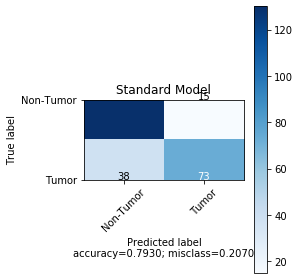

In [6]:
probs, labels = run_model(standard_model, data.valid_loader)

cm = confusion_matrix(np.round(labels).astype(int), np.round(probs).astype(int)) 

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Non-Tumor', 'Tumor'],
                      title        = "Standard Model")

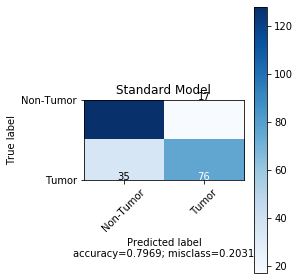

In [7]:
probs, labels = run_model(equivariant_model, data.valid_loader)

cm = confusion_matrix(np.round(labels).astype(int), np.round(probs).astype(int)) 

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Non-Tumor', 'Tumor'],
                      title        = "Standard Model")

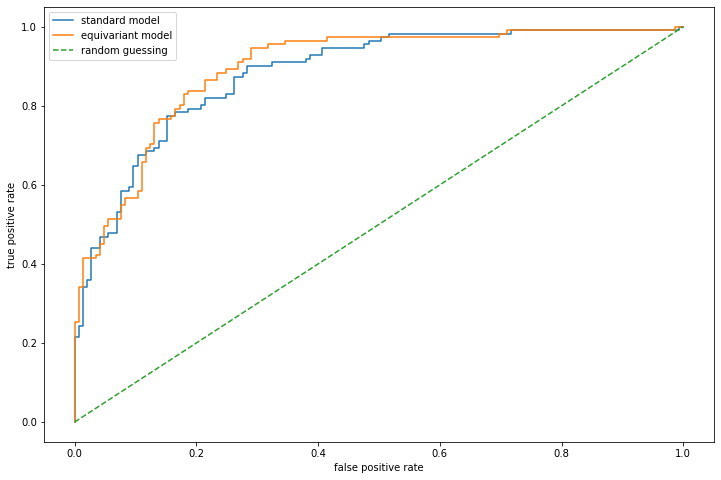

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(probs, labels, title):
    fpr, tpr, _ = roc_curve(labels, probs)
    plt.plot(fpr, tpr, label=title)

plt.figure(figsize=(12, 8))
plot_roc(*run_model(standard_model, data.valid_loader),'standard model')
plot_roc(*run_model(equivariant_model, data.valid_loader), 'equivariant model')
plt.plot([0, 1], label='random guessing', linestyle='dashed')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [13]:
def auc(probs, labels):
    labels = np.round(labels).astype(int)
    result = 0
    true_zeros = probs[labels == 0]
    true_ones = probs[labels == 1]
    for true_zero in true_zeros:
        for true_one in true_ones:
            result += int(true_one > true_zero)
    return result / (len(true_zeros) * len(true_ones))

print(f'auc for Standard Model classifier: {auc(*run_model(standard_model, data.valid_loader))}')
print(f'auc for Equivariant Model classifier: {auc(*run_model(equivariant_model, data.valid_loader))}')


auc for Standard Model classifier: 0.8823858341099721



auc for Equivariant Model classifier: 0.8949363156259708


In [ ]:
standard_predictions = run_model(standard_model, data.valid_loader)[0]
equivariant_predictions = run_model(equivariant_model, data.valid_loader)[0]

plt.figure(figsize=(12, 8))
plt.xlabel('standard model prediction')
plt.ylabel('equivariant model prediction')
plt.scatter(standard_predictions, equivariant_predictions)
plt.show()

In [ ]:
standard_predictions = np.round(standard_predictions).astype(int)
equivariant_predictions = np.round(equivariant_predictions).astype(int)

In [ ]:
# p-test

from scipy.stats import binom


wins_standard = sum((standard_predictions == 1) & (equivariant_predictions == 0)) #how often the standard model won
wins_equivariant = sum((standard_predictions == 0) & (equivariant_predictions == 1)) #how often the equivariant model won
N = wins_standard + wins_equivariant #how often one coin was a winner
print('The standard_predictions won {} times, while the equivariant_predictions won {} times.'.format(wins_standard,wins_equivariant))

In [ ]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
p_value = 1 - b.cdf(wins_equivariant)
print('The p-value is {:.3f}'.format(p_value))